In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
tf.__version__

'2.5.0'

In [3]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [4]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
dataset.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [6]:
dataset.value_counts().sum()

10000

In [7]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
#no missing data

In [9]:
#dropping the first 3 columns as they have no significance

In [10]:
dataset = dataset.drop(labels=['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [11]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
X = dataset.drop('Exited',axis=1).values

In [13]:
y = dataset['Exited'].values

In [14]:
dataset

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [15]:
#encoding the categorical columns, LabelEncoder for Gender (as only options are male and female), and OneHotEncoder for Geography

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le = LabelEncoder()

In [18]:
X[:,2] = le.fit_transform(X[:,2])

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [20]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])],remainder='passthrough')

In [21]:
X = np.array(ct.fit_transform(X))

In [22]:
X.shape

(10000, 12)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
sc = StandardScaler()

In [27]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
from tensorflow.keras.models import Sequential

In [29]:
from tensorflow.keras.layers import Dense, Dropout

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
ann = Sequential()

In [32]:
ann.add(Dense(12, activation = 'relu'))

In [33]:
ann.add(Dense(6, activation = 'relu'))

In [34]:
#output layer
ann.add(Dense(1, activation = 'sigmoid'))

In [35]:
ann.compile(optimizer='adam', loss= 'binary_crossentropy', metrics='accuracy')

In [36]:
ann.fit(x=X_train,y=y_train, batch_size=32, epochs=200, verbose=1)

Epoch 1/200
250/250 [==============================] - 0s 595us/step - loss: 0.6159 - accuracy: 0.6656
Epoch 2/200
250/250 [==============================] - 0s 620us/step - loss: 0.4627 - accuracy: 0.8005
Epoch 3/200
250/250 [==============================] - 0s 605us/step - loss: 0.4340 - accuracy: 0.8061
Epoch 4/200
250/250 [==============================] - 0s 548us/step - loss: 0.4211 - accuracy: 0.8144
Epoch 5/200
250/250 [==============================] - 0s 567us/step - loss: 0.4105 - accuracy: 0.8210
Epoch 6/200
250/250 [==============================] - 0s 597us/step - loss: 0.3991 - accuracy: 0.8265
Epoch 7/200
250/250 [==============================] - 0s 544us/step - loss: 0.3854 - accuracy: 0.8356
Epoch 8/200
250/250 [==============================] - 0s 547us/step - loss: 0.3729 - accuracy: 0.8441
Epoch 9/200
250/250 [==============================] - 0s 544us/step - loss: 0.3621 - accuracy: 0.8509
Epoch 10/200
250/250 [==============================] - 0s 555us/step - l

250/250 [==============================] - 0s 584us/step - loss: 0.3274 - accuracy: 0.8649
Epoch 80/200
250/250 [==============================] - 0s 553us/step - loss: 0.3269 - accuracy: 0.8671
Epoch 81/200
250/250 [==============================] - 0s 617us/step - loss: 0.3272 - accuracy: 0.8652
Epoch 82/200
250/250 [==============================] - 0s 672us/step - loss: 0.3267 - accuracy: 0.8656
Epoch 83/200
250/250 [==============================] - 0s 586us/step - loss: 0.3271 - accuracy: 0.8648
Epoch 84/200
250/250 [==============================] - 0s 554us/step - loss: 0.3269 - accuracy: 0.8652
Epoch 85/200
250/250 [==============================] - 0s 537us/step - loss: 0.3262 - accuracy: 0.8662
Epoch 86/200
250/250 [==============================] - 0s 532us/step - loss: 0.3266 - accuracy: 0.8668
Epoch 87/200
250/250 [==============================] - 0s 555us/step - loss: 0.3268 - accuracy: 0.8652
Epoch 88/200
250/250 [==============================] - 0s 562us/step - loss:

250/250 [==============================] - 0s 560us/step - loss: 0.3215 - accuracy: 0.8670
Epoch 158/200
250/250 [==============================] - 0s 551us/step - loss: 0.3216 - accuracy: 0.8687
Epoch 159/200
250/250 [==============================] - 0s 561us/step - loss: 0.3221 - accuracy: 0.8670
Epoch 160/200
250/250 [==============================] - 0s 550us/step - loss: 0.3216 - accuracy: 0.8664
Epoch 161/200
250/250 [==============================] - 0s 593us/step - loss: 0.3218 - accuracy: 0.8670
Epoch 162/200
250/250 [==============================] - 0s 597us/step - loss: 0.3213 - accuracy: 0.8668
Epoch 163/200
250/250 [==============================] - 0s 575us/step - loss: 0.3217 - accuracy: 0.8676
Epoch 164/200
250/250 [==============================] - 0s 549us/step - loss: 0.3207 - accuracy: 0.8673
Epoch 165/200
250/250 [==============================] - 0s 568us/step - loss: 0.3213 - accuracy: 0.8652
Epoch 166/200
250/250 [==============================] - 0s 653us/ste

In [37]:
losses = pd.DataFrame(ann.history.history)

<AxesSubplot:>

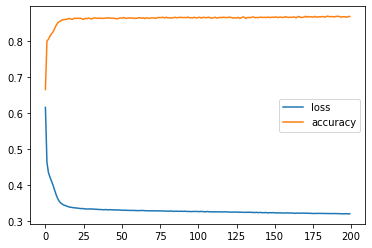

In [38]:
losses.plot()

In [39]:
y_pred = ann.predict_classes(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1490  105]
 [ 195  210]]


D:\Python\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.85

In [40]:
#adding early stop criteria

In [41]:
early_stop = EarlyStopping(monitor='val_loss',patience=50, verbose=1)

In [42]:
ann = Sequential()
ann.add(Dense(12, activation = 'relu'))
ann.add(Dense(6, activation = 'relu'))
ann.add(Dense(1, activation = 'sigmoid'))

In [43]:
ann.compile(optimizer='adam', loss= 'binary_crossentropy', metrics='accuracy')

In [44]:
ann.fit(x=X_train,y=y_train, batch_size=32, epochs=200, verbose=1, callbacks=[early_stop], validation_data=(X_test,y_test))

Epoch 1/200
250/250 [==============================] - 1s 1ms/step - loss: 0.7095 - accuracy: 0.5807 - val_loss: 0.6162 - val_accuracy: 0.8035
Epoch 2/200
250/250 [==============================] - 0s 884us/step - loss: 0.5077 - accuracy: 0.7996 - val_loss: 0.4422 - val_accuracy: 0.8105
Epoch 3/200
250/250 [==============================] - 0s 821us/step - loss: 0.4317 - accuracy: 0.8156 - val_loss: 0.4105 - val_accuracy: 0.8365
Epoch 4/200
250/250 [==============================] - 0s 788us/step - loss: 0.4092 - accuracy: 0.8289 - val_loss: 0.3880 - val_accuracy: 0.8480
Epoch 5/200
250/250 [==============================] - 0s 694us/step - loss: 0.3892 - accuracy: 0.8404 - val_loss: 0.3696 - val_accuracy: 0.8525
Epoch 6/200
250/250 [==============================] - 0s 744us/step - loss: 0.3719 - accuracy: 0.8508 - val_loss: 0.3559 - val_accuracy: 0.8565
Epoch 7/200
250/250 [==============================] - 0s 726us/step - loss: 0.3606 - accuracy: 0.8560 - val_loss: 0.3488 - val_accu

250/250 [==============================] - 0s 804us/step - loss: 0.3267 - accuracy: 0.8666 - val_loss: 0.3367 - val_accuracy: 0.8550
Epoch 58/200
250/250 [==============================] - 0s 679us/step - loss: 0.3270 - accuracy: 0.8666 - val_loss: 0.3363 - val_accuracy: 0.8580
Epoch 59/200
250/250 [==============================] - 0s 825us/step - loss: 0.3269 - accuracy: 0.8651 - val_loss: 0.3321 - val_accuracy: 0.8660
Epoch 60/200
250/250 [==============================] - 0s 709us/step - loss: 0.3266 - accuracy: 0.8676 - val_loss: 0.3344 - val_accuracy: 0.8620
Epoch 61/200
250/250 [==============================] - 0s 829us/step - loss: 0.3264 - accuracy: 0.8674 - val_loss: 0.3353 - val_accuracy: 0.8585
Epoch 62/200
250/250 [==============================] - 0s 780us/step - loss: 0.3264 - accuracy: 0.8683 - val_loss: 0.3353 - val_accuracy: 0.8590
Epoch 63/200
250/250 [==============================] - 0s 718us/step - loss: 0.3268 - accuracy: 0.8660 - val_loss: 0.3345 - val_accuracy

250/250 [==============================] - 0s 718us/step - loss: 0.3229 - accuracy: 0.8681 - val_loss: 0.3360 - val_accuracy: 0.8575
Epoch 114/200
250/250 [==============================] - 0s 714us/step - loss: 0.3227 - accuracy: 0.8670 - val_loss: 0.3355 - val_accuracy: 0.8590
Epoch 115/200
250/250 [==============================] - 0s 710us/step - loss: 0.3229 - accuracy: 0.8666 - val_loss: 0.3360 - val_accuracy: 0.8525
Epoch 116/200
250/250 [==============================] - 0s 707us/step - loss: 0.3227 - accuracy: 0.8671 - val_loss: 0.3359 - val_accuracy: 0.8540
Epoch 117/200
250/250 [==============================] - 0s 696us/step - loss: 0.3222 - accuracy: 0.8684 - val_loss: 0.3386 - val_accuracy: 0.8505
Epoch 118/200
250/250 [==============================] - 0s 708us/step - loss: 0.3228 - accuracy: 0.8666 - val_loss: 0.3372 - val_accuracy: 0.8570
Epoch 119/200
250/250 [==============================] - 0s 717us/step - loss: 0.3232 - accuracy: 0.8684 - val_loss: 0.3337 - val_ac

In [45]:
losses = pd.DataFrame(ann.history.history)

<AxesSubplot:>

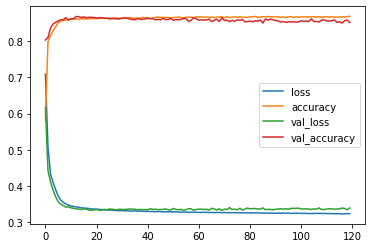

In [46]:
losses.plot()

In [47]:
y_pred = ann.predict_classes(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1488  107]
 [ 189  216]]


D:\Python\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.852

In [48]:
#adding dropout layers
ann = Sequential()
ann.add(Dense(12, activation = 'relu'))
ann.add(Dropout(0.5))
ann.add(Dense(6, activation = 'relu'))
ann.add(Dropout(0.5))
ann.add(Dense(1, activation = 'sigmoid'))

In [49]:
ann.compile(optimizer='adam', loss= 'binary_crossentropy', metrics='accuracy')
ann.fit(x=X_train,y=y_train, batch_size=None, epochs=600, verbose=1, 
        callbacks=[early_stop], validation_data=(X_test,y_test))

Epoch 1/600
250/250 [==============================] - 1s 1ms/step - loss: 0.7718 - accuracy: 0.5828 - val_loss: 0.5703 - val_accuracy: 0.8000
Epoch 2/600
250/250 [==============================] - 0s 785us/step - loss: 0.5793 - accuracy: 0.7646 - val_loss: 0.5082 - val_accuracy: 0.7975
Epoch 3/600
250/250 [==============================] - 0s 832us/step - loss: 0.5392 - accuracy: 0.7879 - val_loss: 0.4879 - val_accuracy: 0.7980
Epoch 4/600
250/250 [==============================] - 0s 716us/step - loss: 0.5226 - accuracy: 0.7944 - val_loss: 0.4739 - val_accuracy: 0.7975
Epoch 5/600
250/250 [==============================] - 0s 730us/step - loss: 0.5076 - accuracy: 0.7987 - val_loss: 0.4647 - val_accuracy: 0.7975
Epoch 6/600
250/250 [==============================] - 0s 781us/step - loss: 0.4948 - accuracy: 0.8036 - val_loss: 0.4550 - val_accuracy: 0.7975
Epoch 7/600
250/250 [==============================] - 0s 853us/step - loss: 0.4887 - accuracy: 0.7995 - val_loss: 0.4525 - val_accu

250/250 [==============================] - 0s 714us/step - loss: 0.4247 - accuracy: 0.8238 - val_loss: 0.3901 - val_accuracy: 0.8185
Epoch 58/600
250/250 [==============================] - 0s 702us/step - loss: 0.4217 - accuracy: 0.8290 - val_loss: 0.3895 - val_accuracy: 0.8185
Epoch 59/600
250/250 [==============================] - 0s 700us/step - loss: 0.4234 - accuracy: 0.8257 - val_loss: 0.3901 - val_accuracy: 0.8175
Epoch 60/600
250/250 [==============================] - 0s 688us/step - loss: 0.4269 - accuracy: 0.8226 - val_loss: 0.3873 - val_accuracy: 0.8190
Epoch 61/600
250/250 [==============================] - 0s 686us/step - loss: 0.4247 - accuracy: 0.8223 - val_loss: 0.3908 - val_accuracy: 0.8180
Epoch 62/600
250/250 [==============================] - 0s 766us/step - loss: 0.4277 - accuracy: 0.8230 - val_loss: 0.3884 - val_accuracy: 0.8175
Epoch 63/600
250/250 [==============================] - 0s 695us/step - loss: 0.4275 - accuracy: 0.8200 - val_loss: 0.3937 - val_accuracy

250/250 [==============================] - 0s 764us/step - loss: 0.4150 - accuracy: 0.8305 - val_loss: 0.3744 - val_accuracy: 0.8275
Epoch 114/600
250/250 [==============================] - 0s 717us/step - loss: 0.4116 - accuracy: 0.8324 - val_loss: 0.3779 - val_accuracy: 0.8265
Epoch 115/600
250/250 [==============================] - 0s 708us/step - loss: 0.4177 - accuracy: 0.8282 - val_loss: 0.3797 - val_accuracy: 0.8250
Epoch 116/600
250/250 [==============================] - 0s 687us/step - loss: 0.4176 - accuracy: 0.8278 - val_loss: 0.3756 - val_accuracy: 0.8255
Epoch 117/600
250/250 [==============================] - 0s 735us/step - loss: 0.4179 - accuracy: 0.8266 - val_loss: 0.3712 - val_accuracy: 0.8355
Epoch 118/600
250/250 [==============================] - 0s 720us/step - loss: 0.4138 - accuracy: 0.8317 - val_loss: 0.3703 - val_accuracy: 0.8385
Epoch 119/600
250/250 [==============================] - 0s 725us/step - loss: 0.4214 - accuracy: 0.8226 - val_loss: 0.3722 - val_ac

Epoch 169/600
250/250 [==============================] - 0s 676us/step - loss: 0.4173 - accuracy: 0.8288 - val_loss: 0.3789 - val_accuracy: 0.8240
Epoch 170/600
250/250 [==============================] - 0s 698us/step - loss: 0.4175 - accuracy: 0.8274 - val_loss: 0.3733 - val_accuracy: 0.8315
Epoch 171/600
250/250 [==============================] - 0s 751us/step - loss: 0.4070 - accuracy: 0.8281 - val_loss: 0.3684 - val_accuracy: 0.8375
Epoch 172/600
250/250 [==============================] - 0s 736us/step - loss: 0.4210 - accuracy: 0.8270 - val_loss: 0.3739 - val_accuracy: 0.8295
Epoch 173/600
250/250 [==============================] - 0s 744us/step - loss: 0.4116 - accuracy: 0.8299 - val_loss: 0.3684 - val_accuracy: 0.8415
Epoch 174/600
250/250 [==============================] - 0s 678us/step - loss: 0.4103 - accuracy: 0.8316 - val_loss: 0.3711 - val_accuracy: 0.8325
Epoch 175/600
250/250 [==============================] - 0s 696us/step - loss: 0.4134 - accuracy: 0.8280 - val_loss: 0

In [50]:
losses = pd.DataFrame(ann.history.history)

<AxesSubplot:>

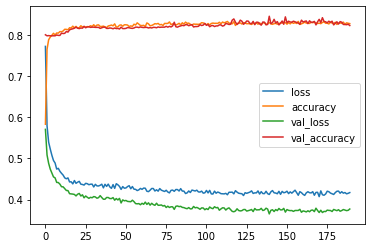

In [51]:
losses.plot()

In [52]:
y_pred = ann.predict_classes(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1590    5]
 [ 350   55]]


D:\Python\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.8225